In [471]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mnist import MNIST
import matplotlib.pyplot as plt

In [45]:
mndata = MNIST('./')
images, labels = mndata.load_training()
images = np.array(images)
labels = np.array(labels)

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=1/6)

train_length = X_train.shape[0]
test_length = X_test.shape[0]
features = X_train.shape[1]

In [468]:
class RandomForest:
    def __init__(self, n, k, M = 3000):
        self.classifiers = []
        self.M = M
        self.k = k
        self.n = n
        self.learn()
        
    def learn(self):
        for i in range(self.M):
            subset = np.random.choice(train_length, self.n)
            feats = np.random.choice(features, self.k)
            tree_clf = DecisionTreeClassifier()
            fit = tree_clf.fit([x[feats] for x in X_train[subset]], Y_train[subset])
            self.classifiers += [[fit, feats]]
            
        self.classifiers = np.array(self.classifiers)
    
    def classify(self, x, y, maxM = 3000):
        def get_probabilities(X):
            def pad_zeros(p, c):
                
                if len(p) == 10:
                    return p
                
                arr = [0] * 10
                for prob, feat in zip(p[0], c):
                    arr[feat] = prob
                return np.array(arr)
            
            probs = np.array([pad_zeros(fit.predict_proba([X[feats]]), fit.classes_) for fit, feats in self.classifiers[:maxM]])
            
            return np.mean(probs, axis=0)
        
        y_hat = np.apply_along_axis(get_probabilities, 1, x)
        
        return sum(np.argmax(y_hat, axis=1) == y) / len(y)
        


In [543]:
n_vals = [1, 5, 10, 25, 50, 100, 300, 500]
locked_n = []

for i in n_vals:
    rand = np.random.choice(test_length, 500)
    clf = RandomForest(i, features // 4, 100)
    locked_n += [clf.classify(X_test[rand], Y_test[rand], 50)]



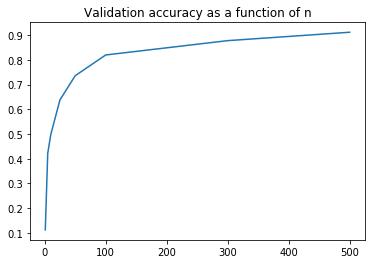

In [544]:
plt.plot(n_vals, locked_n)
plt.title('Validation accuracy as a function of n')
plt.show()

In [476]:
clf = RandomForest(250, features // 2, 3000)
locked_M = []
M_vals = [1, 10, 50, 100, 200, 300, 400]
for i in M_vals:
    rand = np.random.choice(test_length, 500)

    locked_M += [clf.classify(X_test[rand], Y_test[rand], i)]


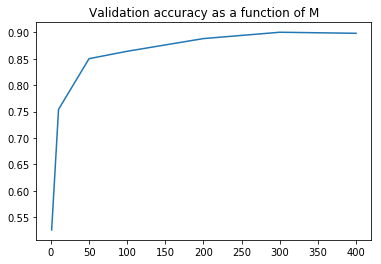

In [531]:
plt.plot(M_vals, locked_M)
plt.title('Validation accuracy as a function of M')
plt.show()

In [547]:
k_vals = [10, 25, 50, 75, features // 6, features // 4, features // 2, features]
locked_k = []

for i in k_vals:
    rand = np.random.choice(test_length, 500)
    clf = RandomForest(300, i, 200)
    locked_k += [clf.classify(X_test[rand], Y_test[rand], 500)]



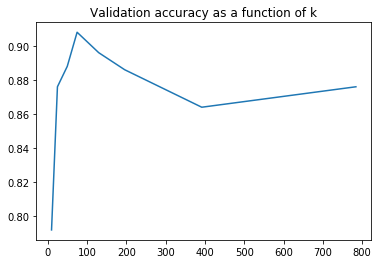

In [548]:
plt.plot(k_vals, locked_k)
plt.title('Validation accuracy as a function of k')
plt.show()

Validation accuracy seems to go over 90% when proper and sufficiently large parameters are used. M and n seemed to increase and plateau similarily nearly every time they were ran and k looks like it might be overfitting with large amount of parameters.

#3

In [513]:
def func(x1, x2):
    return x1**2*np.sin(x1**2 + np.exp(x2))

In [518]:
(func(1,2+10e-5) - func(1, 2)) / 10e-5

-3.770254007502416

In [519]:
(func(1+10e-5, 2) - func(1, 2)) / 10e-5

0.7003100866043166